# Chapter 5 순환 신경망(RNN)

**피드포워드(feed forward) 신경망**: 단방향 신경망

피드포워드 신경망은 시계열 데이터를 잘 다루지 못한다는 단점이 있다. 그래서 등장하게 된 것이 **순환 신경망(RNN)**이다.

## 5.1 확률과 언어 모델

word2vec 복습

### 5.1.1 word2vec을 확률 관점에서 바라보다

CBOW 모델: 맥락으로부터 타깃을 추측

윈도우 크기가 1이고 맥락을 좌우 대칭으로 생각할 때  
$P(w_t|w_{t-1},w_{t+1})$

윈도우를 왼쪽으로만 한정  
$P(w_t|w_{t-2},w_{t-1})$  
손실 함수(L) = $-logP(w_t|w_{t-2},w_{t-1})$, 이 값을 최소화 하는 것이 목적

학습 후엔 부산물로 단어의 분산 표현을 얻을 수 있다.

### 5.1.2 언어 모델

언어모델(language model)은 단어 나열에 확률을 부여한다. 얼마나 자연스러운 단어 순서인지를 확률로 평가.

응용 예시: 기계번역, 음성인식, 새로운 문장 생성

언어 모델 수식: 동시 확률은 사후 확률의 총곱으로 나타낼 수 있다.

$$\begin {align}
P(w_1, \cdots, w_m) &= P(w_m|w_1, \cdots, w_{m-1})P(w_{m-1}|w_1, \cdots, w_{m-2}) \cdots P(w_3|w_1,w_2)P(w_2|w_1)P(w_1) \\
&= \prod_{t=1}^mP(w_t|w_1, \cdots, w_{t-1}) \\
\end{align}$$

확률의 곱셈정리

$$P(A,B) = P(A|B)P(B) = P(B|A)P(A)$$

곱셈 정리를 이용한 m개 단어의 동시 확률을 사후 확률로 표현하는 과정

<img src="./images/e 5-6.png" width=350>
<img src="./images/e 5-7.png" width=450>

사후 확률은 타깃 단어보다 왼쪽에 있는 모든 단어를 맥락으로 했을 때의 확률이라는 의미로 볼 수 있다.

언어모델을 조건부 언어모델이라고도 한다.

### 5.1.3 CBOW 모델을 언어 모델로?

언어모델에 적용한 CBOW 모델(근사적)

$$P(w_1, \cdots, w_m) = \prod_{t=1}^m P(w_t|w_1, \cdots, w_{t-1}) \approx \prod_{t=1}^mP(w_t|w_{t-2}, w_{t-1})$$

맥락을 왼쪽 2개로 한정

**마르코프 연쇄(Markov Chain)**: 미래 상태가 현재 상태에만 의존해 결정되는 것, 직전 N개의 사건에만 의존하면 N층 마르코프 연쇄
    
CBOW 모델의 문제점
- 맥락의 크기가 결국 고정되어, 맥락 이전의 정보가 필요할 경우 문제를 해결할 수 없다.
- 맥락 안의 단어 순서가 무시된다. 순서 대신 분포를 이용하기 때문이다. CBOW에선 은닉층에 단어 벡터들의 합이 전달된다.

<img src="./images/fig%205-5.png" width=700>

순서를 고려하기 위해서 단어 벡터를 **연결(concatenat)**하는 방식을 사용한다. 신경 확률론적 언어 모델(Neural Probabilistic Language Model)에선 이 방식을 사용한다. 하지만 연결하면 매개 변수가 증가하는 문제가 생긴다.

이 문제를 해결하기 위해 등장한 것이 RNN이다. RNN은 아무리 긴 맥락의 정보라도 기억할 수 있다.

word2vec은 단어의 분산 표현을 얻을 목적으로 고안된 기법으로 언어 모델에 사용하는 경우는 사실 없다. 책에선 설명을 위해서 억지로 적용한 것이다.

## 5.2 RNN이란?

Recursive Neural Network(재귀 신경망)은 트리 구조의 데이터를 처리하기 위한 신경망으로 Recurrent Neural Network(순환 신경망)과는 다른 개념이다.

### 5.2.1 순환하는 신경망

RNN의 특징은 순환하는 경로(닫힌 경로)가 있다는 것이다. 이 덕분에 과거의 정보를 기억함과 동시에 최신 데이터를 갱신할 수 있다.

<img src="./images/fig%205-6.png" width=300>

- $x_t$: 입력 데이터, 벡터라고 가정, 예를 들면 단어의 분산 표현
- $t$: 시각
- $h_t$: 입력에 대응한 출력
- 출력은 분기되어 다시 입력으로 들어간다.

### 5.2.2 순환 구조 펼치기

<img src="./images/fig%205-8.png" width=800>

펼치면 피드 포워드 층처럼 표현이 가능하다. 하지만 각 층이 같은 계층인 것은 주의해야 한다.

각 시각마다 수행하는 계산

$$h_t = tanh(h_{t-1}W_h + x_tW_x + b)$$

$h_{t-1}$과 $x_t$는 행 벡터이다. 현재의 출력($h_t$)는 이전 출력($h_{t-1}$)에 기초해서 계산된다. RNN는 h라는 상태를 갖고 이를 통해 갱신이 된다고 해석할 수 있다. 그래서 RNN을 상태, 메모리를 가지는 계층이라고 부른다.

$h_t$를 은닉 상태, 은닉 상태 벡터라고 한다.

### 5.2.3 BPTT

<img src="./images/fig%205-10.png" width=800>

**BPTT(backpropagation through time)**: 시간 방향으로 펼친 신경망의 오차역전파법, 일반적인 오차역전파법처럼 적용할 수 있다.

#### 문제
- 시간에 비례해서 커지는 컴퓨팅 자원, ex) 메모리 사용량 증가, 계산량 증가
- 시간에 비례해서 불안정해지는 기울기

### 5.2.4 Truncated BPTT

큰 시계열 데이터를 적당한 길이로 끊어 여러 작은 신경망으로 만든 후 오차역전파법을 수행하는 방법이다. 단, **역전파의 연결만 끊고, 순전파는 그대로 유지해야 한다.** 입력 데이터는 순서대로 넣어줘야 한다.

<img src="./images/fig%205-14.png">

다음 블록에서 이전 블록의 마지막 은닉 상태를 이용해서 각 블록을 순서대로 연결할 수 있도록 한다. 역전파는 각 블록을 단위로 수행한다.

### 5.2.5 Truncated BPTT의 미니배치 학습

미니배치의 시작 위치를 오프셋으로 옮겨준 후에 순서대로 데이터를 입력하면 된다.

## 5.3 RNN 구현

가로로 펼친 RNN은 여러 입력과 출력을 묶어 하나의 계층으로 볼 수 있고, 책에선 여러 단계의 작업을 한꺼번에 처리할 때 앞에 Time을 붙여준다.

### 5.3.1 RNN 계층 구현

순전파

$$h_t = tanh(h_{t-1}W_h + x_tW_x + b)$$

데이터는 미니배치로 처리한다.

<img src="./images/fig%205-18.png" width=600>
<img src="./images/fig%205-19.png" width=600>
<img src="./images/fig%205-20.png" width=600>

tanh 미분

$$y = tanh(x)$$

$$\frac {dy} {dx} = 1 - y^2$$

In [1]:
import numpy as np

In [7]:
class RNN:
    
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None    # 역전파 계산 시 사용하는 중간 데이터
        
    
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        
        return h_next
    
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next**2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

### 5.3.2 Time RNN 계층 구현

T개의 RNN 계층으로 구현

<img src="./images/fig%205-22.png" width=800>
<img src="./images/fig%205-23.png" width=700>
<img src="./images/fig%205-24.png" width=700>

순전파에서 출력이 2개로 분기되기 때문에 역전파에서는 각 기울기가 합산되어 전해진다.

In [22]:
class TimeRNN:
    
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.dh = None, None
        self.stateful = stateful
    
    
    def set_state(self, h):
        self.h = h
        
    
    def reset_state(self):
        self.h = None
        
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype='f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
            
        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs
    
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs

h는 forward를 불렀을 때 마지막 은닉 상태를 저장, dh는 backward를 불렀을 때 하나 앞 블록의 은닉 상태의 기울기를 저장한다.  
stateful은 은닉 상태를 유지할지 정하는 인수, True: 은닉 상태 유지, False: 은닉상태를 영행렬로 초기화(무상태), 긴 시계열 데이터를 처리할 때 은닉 상태를 유지해야 한다.

Time RNN 계층의 최종 가중치의 기울기는 각 RNN 계층의 가중치 기울기를 모두 더한 게 된다.

## 5.4 시계열 데이터 처리 계층 구현

### 5.4.1 RNNLM의 전체 그림

<img src="./images/fig%205-25.png" width=700>

RNN 계층이 있어서 과거에서 현재로 데이터를 계속 흘려보내줌으로써 과거의 정보를 인코딩해 기억할 수 있다. RNNLM은 지금까지 입력된 단어를 기억하고 그것을 바탕으로 다음에 출현할 단어를 예측한다.

### 5.4.2 Time 계층 구현

Time Affine 계층: Affine 계층을 T개 준비해서, 각 시각의 데이터를 개별적으로 처리한다.

Time Embedding 계층: Embedding 계층을 T개 준비하고 각 시각의 데이터를 개별적으로 처리한다.

Affine과 Embedding 계층은 코드로 구현할 땐 행렬 계산으로 한꺼번에 처리한다.

<img src="./images/fig%205-29.png" width=700>

$$L = \frac 1 T (L_0 + L_1 + \cdots + L_{t-1})$$

Time Softmax with Loss 계층도 미니배치를 처리하기 때문에 N개의 손실을 더해 다시 N으로 나눠 데이터 1개당 평균 손실을 최종 출력으로 내보낸다.

## 5.5 RNNLM 학습과 평가

### 5.5.1 RNNLM 구현

<img src="./images/fig%205-30.png" width=400>

In [23]:
import numpy as np
from common.time_layers import *

In [25]:
class SimpleRnnlm:
    
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        # RNN, Affine 계층은 Xavier 초깃값 사용: 이전 계층의 노드가 n개일때 1/sqrt(n)을 표준편차인 분포로 초기화
        rnn_Wx = (rn(D, H) / np.sqrt(D).astype('f'))
        rnn_Wh = (rn(H, H) / np.sqrt(H).astype('f'))
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H).astype('f'))
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),    # Truncated RNN으로 학습
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
        
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs)
        
        return loss
    
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
            
        return dout
    
    
    def reset_state(self):
        self.rnn_layer.reset_state()

가중치 초깃값으로 0.01 * np.random.uniform()처럼 스케일을 변환한 균일분포를 이용하는 경우도 많다.

### 5.2.2 언어 모델의 평가

**퍼플렉서티(perplexity, 혼란도)**: 간단히 학률의 역수(입력이 하나일 경우), 퍼플렉서티는 낮을수록 좋다.

퍼플렉서티를 비교할 때 분기 수(number of branches)로 해석할 수 있고, 이는 다음에 취할 수 있는 선택사항의 수를 말한다. 만약 1.25라면 다음에 출현할 단어의 후보를 거의 1개 정도로 좁혔다고 볼 수 있고, 5인 경우에는 후보가 아직 5개나 된다는 것을 의미한다.

입력이 여러 개일 때의 퍼플렉서티

$$L = -\frac 1 N \sum_n\sum_k t_{nk}logy_{nk}$$

$$perplexity = e^L$$

L은 신경망의 손실을 뜻한다. 데이터가 하나일 때의 의미는 모두 일맥상통한다.

정보이론 분야에서는 퍼플렉서티를 기하평균 분기 수라고도 한다. 분기 수를 데이터가 N개인 경우에 평균한 것으로 해석할 수 있다.

### 5.5.3 RNNLM의 학습 코드

PTB 데이터셋으로 학습

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import Adam
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

In [53]:
# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5    # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]    # 입력
ts = corpus[1:]     # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model  = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()

# 각 미니배치에서 샘플을 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
        
        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        
    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f' % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 398.50
| 에폭 2 | 퍼플렉서티 243.60
| 에폭 3 | 퍼플렉서티 196.28
| 에폭 4 | 퍼플렉서티 186.40
| 에폭 5 | 퍼플렉서티 174.51
| 에폭 6 | 퍼플렉서티 165.44
| 에폭 7 | 퍼플렉서티 150.12
| 에폭 8 | 퍼플렉서티 132.66
| 에폭 9 | 퍼플렉서티 109.21
| 에폭 10 | 퍼플렉서티 89.49
| 에폭 11 | 퍼플렉서티 72.67
| 에폭 12 | 퍼플렉서티 58.22
| 에폭 13 | 퍼플렉서티 45.84
| 에폭 14 | 퍼플렉서티 35.92
| 에폭 15 | 퍼플렉서티 28.62
| 에폭 16 | 퍼플렉서티 22.78
| 에폭 17 | 퍼플렉서티 17.91
| 에폭 18 | 퍼플렉서티 14.20
| 에폭 19 | 퍼플렉서티 11.62
| 에폭 20 | 퍼플렉서티 9.60
| 에폭 21 | 퍼플렉서티 7.94
| 에폭 22 | 퍼플렉서티 6.71
| 에폭 23 | 퍼플렉서티 5.59
| 에폭 24 | 퍼플렉서티 4.78
| 에폭 25 | 퍼플렉서티 4.11
| 에폭 26 | 퍼플렉서티 3.62
| 에폭 27 | 퍼플렉서티 3.18
| 에폭 28 | 퍼플렉서티 2.82
| 에폭 29 | 퍼플렉서티 2.56
| 에폭 30 | 퍼플렉서티 2.31
| 에폭 31 | 퍼플렉서티 2.13
| 에폭 32 | 퍼플렉서티 1.97
| 에폭 33 | 퍼플렉서티 1.84
| 에폭 34 | 퍼플렉서티 1.73
| 에폭 35 | 퍼플렉서티 1.65
| 에폭 36 | 퍼플렉서티 1.57
| 에폭 37 | 퍼플렉서티 1.50
| 에폭 38 | 퍼플렉서티 1.45
| 에폭 39 | 퍼플렉서티 1.40
| 에폭 40 | 퍼플렉서티 1.36
| 에폭 41 | 퍼플렉서티 1.33
| 에폭 42 | 퍼플렉서티 1.30
| 에폭 43 | 퍼플렉서티 1.28
| 에폭 44 | 퍼플렉서티 1.25
| 에폭 45 | 퍼플렉서티 1.23
| 에폭 46 | 퍼플

In [42]:
# 배치를 어떻게 뽑아오는지 알아보기 위해서
time_idx = 0
for t in range(time_size):
    for i, offset in enumerate(offsets):
        print(i, t, (offset + time_idx) % data_size)
    print()
    time_idx += 1

0 0 0
1 0 99
2 0 198
3 0 297
4 0 396
5 0 495
6 0 594
7 0 693
8 0 792
9 0 891

0 1 1
1 1 100
2 1 199
3 1 298
4 1 397
5 1 496
6 1 595
7 1 694
8 1 793
9 1 892

0 2 2
1 2 101
2 2 200
3 2 299
4 2 398
5 2 497
6 2 596
7 2 695
8 2 794
9 2 893

0 3 3
1 3 102
2 3 201
3 3 300
4 3 399
5 3 498
6 3 597
7 3 696
8 3 795
9 3 894

0 4 4
1 4 103
2 4 202
3 4 301
4 4 400
5 4 499
6 4 598
7 4 697
8 4 796
9 4 895



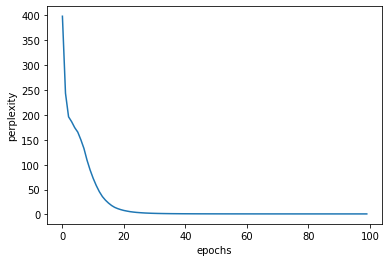

In [54]:
plt.plot(range(max_epoch), ppl_list)
plt.xlabel("epochs")
plt.ylabel("perplexity")
plt.show()

In [55]:
ppl_list[-1] # optimizer을 adam으로만 바꿨는데 퍼플렉서티가 더욱 낮아졌다. SGD의 경우에는 5에 가까웠다.

1.0241756093884897

학습을 진행할 수록 퍼플렉서티가 순조롭게 낮아지고 있다. 하지만 큰 말뭉치에는 대응할 수 없다.

### 5.5.4 RNNLM의 Trainer 클래스

RnnlmTrainer 클래스를 사용하면 학습을 클래스 안으로 숨길 수 있다. fit() 메소드를 호출해서 학습을 수행한다.

학습 수행 과정
1. 미니배치를 '순차적'으로 만든다.
2. 모델의 순전파와 역전파를 호출한다
3. 옵티마이저로 가중치를 갱신한다.
4. 퍼플렉서티를 구한다.

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 420.49
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 400.28
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 305.56
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 229.15
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 213.35
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 210.87
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 202.08
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 201.18
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.49
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.02
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.01
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 188.90
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.84
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.48
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.09
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.57
| 에폭 17 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.82
| 에폭 18 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 183.28
| 에폭 19 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 180.21
| 에폭 20 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 180.50
| 에폭 21 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 177.17
| 에폭 22 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 176.

C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54540 missing from current font.
  f

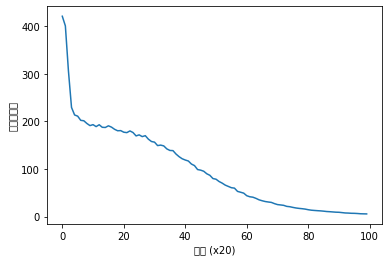

In [56]:
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()

In [57]:
trainer.ppl_list[-1] # SGD를 사용한 결과

5.7043586902585375